# End-to-End Machine Learning Project Tutorial - Part 1


https://github.com/dswh/fuel-consumption-end-to-end-ml



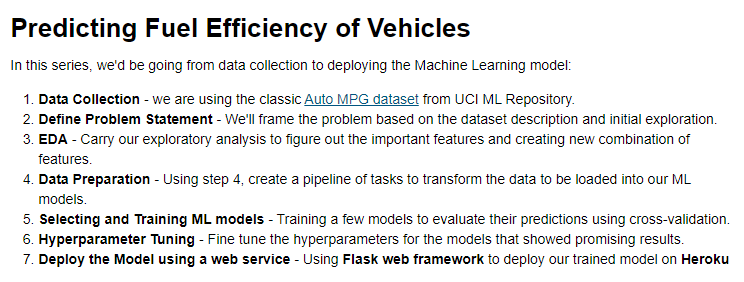

In [ ]:

!wget "http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data"

--2021-07-11 05:45:40--  http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 30286 (30K) [application/x-httpd-php]
Saving to: ‘auto-mpg.data’

auto-mpg.data       100%[===================>]  29.58K  --.-KB/s    in 0.1s    

2021-07-11 05:45:41 (228 KB/s) - ‘auto-mpg.data’ saved [30286/30286]



In [ ]:
##importing a few general use case libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [ ]:
# reading the .data file using pandas

cols = ['MPG','Cylinders','Displacement','Horsepower','Weight',
                'Acceleration', 'Model Year', 'Origin']

df = pd.read_csv('./auto-mpg.data', names=cols, na_values = "?",
                comment = '\t',
                sep= " ",
                skipinitialspace=True)

data = df.copy()

In [ ]:
data.sample(20)

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
75,14.0,8,318.0,150.0,4077.0,14.0,72,1
367,28.0,4,112.0,88.0,2605.0,19.6,82,1
245,36.1,4,98.0,66.0,1800.0,14.4,78,1
250,19.4,8,318.0,140.0,3735.0,13.2,78,1
58,25.0,4,97.5,80.0,2126.0,17.0,72,1
18,27.0,4,97.0,88.0,2130.0,14.5,70,3
287,16.5,8,351.0,138.0,3955.0,13.2,79,1
143,26.0,4,97.0,78.0,2300.0,14.5,74,2
163,18.0,6,225.0,95.0,3785.0,19.0,75,1
134,16.0,6,258.0,110.0,3632.0,18.0,74,1


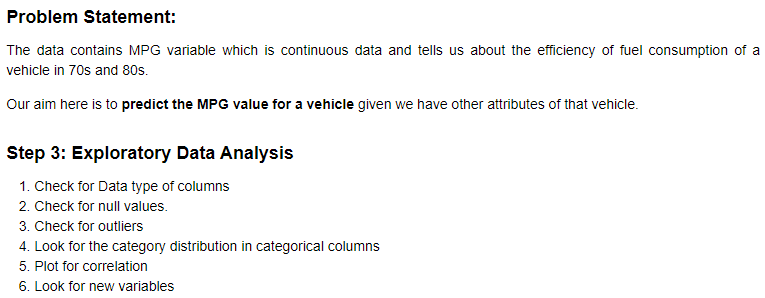

In [ ]:
# Check Data Info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   MPG           398 non-null    float64
 1   Cylinders     398 non-null    int64  
 2   Displacement  398 non-null    float64
 3   Horsepower    392 non-null    float64
 4   Weight        398 non-null    float64
 5   Acceleration  398 non-null    float64
 6   Model Year    398 non-null    int64  
 7   Origin        398 non-null    int64  
dtypes: float64(5), int64(3)
memory usage: 25.0 KB


In [ ]:
# Checking the Null Values
data.isnull()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
393,False,False,False,False,False,False,False,False
394,False,False,False,False,False,False,False,False
395,False,False,False,False,False,False,False,False
396,False,False,False,False,False,False,False,False


In [ ]:
# including sum() -- > gives you the sum of all the true values
data.isnull().sum()

MPG             0
Cylinders       0
Displacement    0
Horsepower      6
Weight          0
Acceleration    0
Model Year      0
Origin          0
dtype: int64

In [ ]:
# Summary statistics of the data
data.describe()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
count,398.000000,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,38.491160,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,126.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


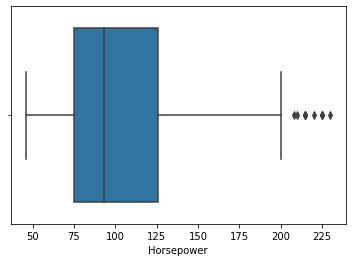

In [ ]:
# To visualize the outliers
sns.boxplot(x=data['Horsepower'])

In [ ]:
# imputing the missing values with Median (and not Mean since mean could be sensitive to the outlier values)
median = data['Horsepower'].median()
data['Horsepower'] = data['Horsepower'].fillna(median)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   MPG           398 non-null    float64
 1   Cylinders     398 non-null    int64  
 2   Displacement  398 non-null    float64
 3   Horsepower    398 non-null    float64
 4   Weight        398 non-null    float64
 5   Acceleration  398 non-null    float64
 6   Model Year    398 non-null    int64  
 7   Origin        398 non-null    int64  
dtypes: float64(5), int64(3)
memory usage: 25.0 KB


In [ ]:
# Category distribution
# Unique Cylinder values
data['Cylinders'].unique()

array([8, 4, 6, 3, 5])

In [ ]:
data['Cylinders'].value_counts()

4    204
8    103
6     84
3      4
5      3
Name: Cylinders, dtype: int64

Below gives the Percentage of each category distribution
eg.. 51% of records have 4 cylinder, 25% have 8 , 21% have 6 and so on. We will have to keep this in mind when training ML model in order to address imbalanced classes 

In [ ]:
data['Cylinders'].value_counts()/len(data)

4    0.512563
8    0.258794
6    0.211055
3    0.010050
5    0.007538
Name: Cylinders, dtype: float64

In [ ]:
data['Origin'].value_counts()

1    249
3     79
2     70
Name: Origin, dtype: int64

# Below we do EDA for exploratory data analysis 

In the Below case: MPG is negatively corelated with Displacement, Weight and Horsepower. 

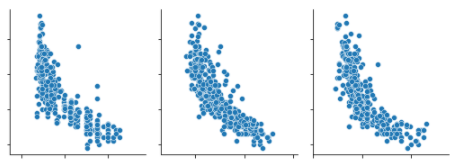


Likewise, Displacement is positively corelated with weight and horsepower

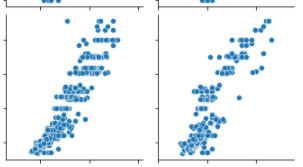

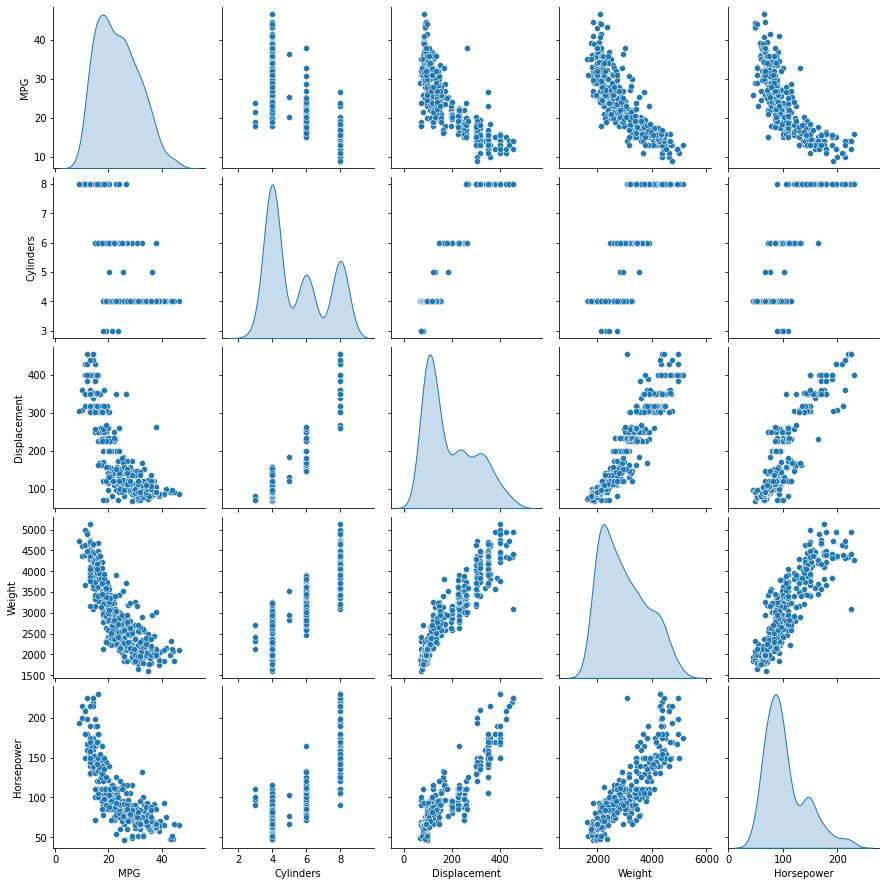

In [ ]:
## pairplots to get an intution of potential correlations

sns.pairplot(data[["MPG", "Cylinders", "Displacement", "Weight", "Horsepower"]], diag_kind="kde")

# Data Preparation with Sci-kit learn and Pandas | End-to-End ML Project Tutorial - Part 2

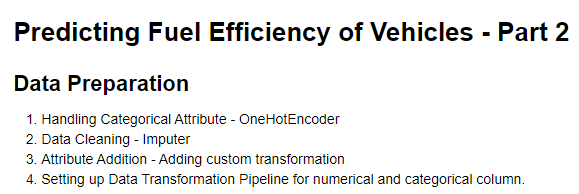

In [ ]:
##importing a few general use case libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import StratifiedShuffleSplit

import warnings
warnings.filterwarnings('ignore')

In [ ]:
# reading the .data file using pandas

cols = ['MPG','Cylinders','Displacement','Horsepower','Weight',
                'Acceleration', 'Model Year', 'Origin']

df = pd.read_csv('./auto-mpg.data', names=cols, na_values = "?",
                comment = '\t',
                sep= " ",
                skipinitialspace=True)

data = df.copy()

# Understand the Split -->
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(data, data["Cylinders"]):
    strat_train_set = data.loc[train_index]
    strat_test_set = data.loc[test_index]

#  Segregating Target and Feature variables

In [ ]:
data = strat_train_set.drop("MPG", axis=1)
data_labels = strat_train_set["MPG"].copy()
data

,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
145,4,83.0,61.0,2003.0,19.0,74,3
151,4,79.0,67.0,2000.0,16.0,74,2
388,4,156.0,92.0,2585.0,14.5,82,1
48,6,250.0,88.0,3139.0,14.5,71,1
114,4,98.0,90.0,2265.0,15.5,73,2
...,...,...,...,...,...,...,...
147,4,90.0,75.0,2108.0,15.5,74,2
156,8,400.0,170.0,4668.0,11.5,75,1
395,4,135.0,84.0,2295.0,11.6,82,1
14,4,113.0,95.0,2372.0,15.0,70,3


# Preprocessing the Origin Column

In [ ]:
def preprocess_origin_cols(df):
    df["Origin"] = df["Origin"].map({1: "India", 2: "USA", 3: "Germany"})
    return df
data_tr = preprocess_origin_cols(data)
data_tr.head()

,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
145,4,83.0,61.0,2003.0,19.0,74,Germany
151,4,79.0,67.0,2000.0,16.0,74,USA
388,4,156.0,92.0,2585.0,14.5,82,India
48,6,250.0,88.0,3139.0,14.5,71,India
114,4,98.0,90.0,2265.0,15.5,73,USA


# One Hot Encoding the Origin Column

In [ ]:
data_tr.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 318 entries, 145 to 362
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Cylinders     318 non-null    int64  
 1   Displacement  318 non-null    float64
 2   Horsepower    314 non-null    float64
 3   Weight        318 non-null    float64
 4   Acceleration  318 non-null    float64
 5   Model Year    318 non-null    int64  
 6   Origin        318 non-null    object 
dtypes: float64(4), int64(2), object(1)
memory usage: 19.9+ KB


In [ ]:
##isolating the origin column
data_cat = data_tr[["Origin"]]
data_cat.head()

,Origin
145,Germany
151,USA
388,India
48,India
114,USA


In [ ]:
##onehotencoding the categorical values
from sklearn.preprocessing import OneHotEncoder

cat_encoder = OneHotEncoder()
data_cat_1hot = cat_encoder.fit_transform(data_cat)
data_cat_1hot   # returns a sparse matrix

<318x3 sparse matrix of type '<class 'numpy.float64'>'
	with 318 stored elements in Compressed Sparse Row format>

In [ ]:
# To visualise in term of an array
data_cat_1hot.toarray()[:5]

array([[1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

In [ ]:
cat_encoder.categories_

[array(['Germany', 'India', 'USA'], dtype=object)]

#Handling Missing values using SimpleImputer

In [ ]:

##segregating the numerical columns; slice ( :-1 )means that the last column isn't included  
num_data = data.iloc[:, :-1]
num_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 318 entries, 145 to 362
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Cylinders     318 non-null    int64  
 1   Displacement  318 non-null    float64
 2   Horsepower    314 non-null    float64
 3   Weight        318 non-null    float64
 4   Acceleration  318 non-null    float64
 5   Model Year    318 non-null    int64  
dtypes: float64(4), int64(2)
memory usage: 17.4 KB


In [ ]:
##handling missing values
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="median")
imputer.fit(num_data)

SimpleImputer(add_indicator=False, copy=True, fill_value=None,
              missing_values=nan, strategy='median', verbose=0)

In [ ]:

##median of all the columns from imputer
imputer.statistics_

array([   4. ,  146. ,   92. , 2844. ,   15.5,   76. ])

In [ ]:

##median from pandas dataframe - same
data.median().values

array([   4. ,  146. ,   92. , 2844. ,   15.5,   76. ])

In [ ]:
##imputing the missing values by transforming the dataframe
# Output is a N-D array
X = imputer.transform(num_data)
X


array([[   4. ,   83. ,   61. , 2003. ,   19. ,   74. ],
       [   4. ,   79. ,   67. , 2000. ,   16. ,   74. ],
       [   4. ,  156. ,   92. , 2585. ,   14.5,   82. ],
       ...,
       [   4. ,  135. ,   84. , 2295. ,   11.6,   82. ],
       [   4. ,  113. ,   95. , 2372. ,   15. ,   70. ],
       [   6. ,  146. ,  120. , 2930. ,   13.8,   81. ]])

In [ ]:
##converting the 2D array back into a dataframe
data_tr = pd.DataFrame(X, columns=num_data.columns,
                          index=num_data.index)
data_tr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 318 entries, 145 to 362
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Cylinders     318 non-null    float64
 1   Displacement  318 non-null    float64
 2   Horsepower    318 non-null    float64
 3   Weight        318 non-null    float64
 4   Acceleration  318 non-null    float64
 5   Model Year    318 non-null    float64
dtypes: float64(6)
memory usage: 17.4 KB


#Adding Attributes using BaseEstimator and Transformer

In [ ]:
num_data.head()

,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year
145,4,83.0,61.0,2003.0,19.0,74
151,4,79.0,67.0,2000.0,16.0,74
388,4,156.0,92.0,2585.0,14.5,82
48,6,250.0,88.0,3139.0,14.5,71
114,4,98.0,90.0,2265.0,15.5,73


# We are **inheriting the BaseEstimator, TransformerMixin classes of Scikit Learn** in our **own class CustomAttrAdder()**


---



# in order to **create New Feature like : Acceleration/Cylinder and Acceleration/Horsepower**

In [ ]:

from sklearn.base import BaseEstimator, TransformerMixin

# Defining the Column Index for Acceleration , Horsepower and Cylinder
acc_ix, hpower_ix, cyl_ix = 4, 2, 0

class CustomAttrAdder(BaseEstimator, TransformerMixin):
  # Defined a Constructer with by default feature -- acc_on_power=True 
    def __init__(self, acc_on_power=True): # no *args or **kargs
        self.acc_on_power = acc_on_power
  # No changes in the fit function
    def fit(self, X, y=None):
        return self  # nothing else to do
  # Modifying the transform function to return a Concatenated array of (x, acc_on_powerand acc_on_cyl)
    def transform(self, X):
        # Just divide the Acceleration by Cylinder
        acc_on_cyl = X[:, acc_ix] / X[:, cyl_ix]
        # If acc_on_power is True then divide Acceleration by HorsePower
        if self.acc_on_power:
            acc_on_power = X[:, acc_ix] / X[:, hpower_ix]
            return np.c_[X, acc_on_power, acc_on_cyl]
        # If acc_on_power is False then just return concateded array X and  Acceleration by Cylinder
        return np.c_[X, acc_on_cyl]

# Creating a Transformation object of our own class    
attr_adder = CustomAttrAdder(acc_on_power=True)
# Feeding the dataframe by converting to array by .values() function 
data_tr_extra_attrs = attr_adder.transform(data_tr.values)
data_tr_extra_attrs[0]

array([4.0000000e+00, 8.3000000e+01, 6.1000000e+01, 2.0030000e+03,
       1.9000000e+01, 7.4000000e+01, 3.1147541e-01, 4.7500000e+00])

Above view that at last two additional features Acc on cylinder and Acc on Horsepoer has been added


#Creating a Pipeline of tasks

# A better method to select the Numerical data


```
numerics = ['float64', 'int64']
num_data = data_tr.select_dtypes(include=numerics)
```



# Its a Best practice to always scale your Numerical values
##Using StandardScaler to scale all the numerical attributes

from sklearn.preprocessing import StandardScaler

In [ ]:
##Using Pipeline class
from sklearn.pipeline import Pipeline

# Its a Best practice to always scale your Numerical values
##Using StandardScaler to scale all the numerical attributes
from sklearn.preprocessing import StandardScaler

# A better method to select the Numerical data
numerics = ['float64', 'int64']
num_data = data_tr.select_dtypes(include=numerics)

##pipeline for numerical attributes
##imputing -> adding attributes -> scale them
num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
        ('attrs_adder', CustomAttrAdder()),
        ('std_scaler', StandardScaler()),
    ])

num_data_tr = num_pipeline.fit_transform(num_data)
num_data_tr[0]

array([-0.85657842, -1.07804475, -1.15192977, -1.17220298,  1.21586943,
       -0.54436373,  1.70952741,  1.29565517])


# Transforming Numerical and Categorical Attributes

## Finally the below data would be feeded to an ML model

In [ ]:
##Transform different columns or subsets using ColumnTransformer
from sklearn.compose import ColumnTransformer

num_attrs = list(num_data)
cat_attrs = ["Origin"]

##complete pipeline to transform 
##both numerical and cat. attributes
full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attrs),
        ("cat", OneHotEncoder(), cat_attrs),
    ])

prepared_data = full_pipeline.fit_transform(data)
prepared_data[0]

array([-0.85657842, -1.07804475, -1.15192977, -1.17220298,  1.21586943,
       -0.54436373,  1.70952741,  1.29565517,  1.        ,  0.        ,
        0.        ])

# Training and Fine-Tuning ML Models with Sklearn | End-to-End ML Project Tutorial - Part 3


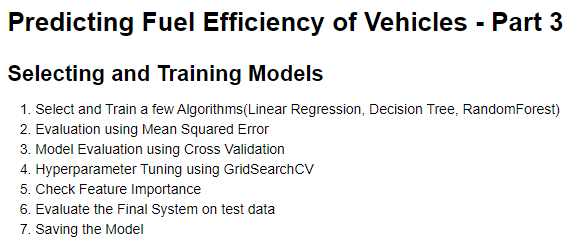


In [ ]:
##importing a few general use case libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer



import warnings
warnings.filterwarnings('ignore')

In [ ]:

# reading the .data file using pandas

cols = ['MPG','Cylinders','Displacement','Horsepower','Weight',
                'Acceleration', 'Model Year', 'Origin']

df = pd.read_csv('./auto-mpg.data', names=cols, na_values = "?",
                comment = '\t',
                sep= " ",
                skipinitialspace=True)

data = df.copy()

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(data, data["Cylinders"]):
    strat_train_set = data.loc[train_index]
    strat_test_set = data.loc[test_index]

In [ ]:

##segregate the feature and target variable
data = strat_train_set.drop("MPG", axis=1)
data_labels = strat_train_set["MPG"].copy()
data

,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
145,4,83.0,61.0,2003.0,19.0,74,3
151,4,79.0,67.0,2000.0,16.0,74,2
388,4,156.0,92.0,2585.0,14.5,82,1
48,6,250.0,88.0,3139.0,14.5,71,1
114,4,98.0,90.0,2265.0,15.5,73,2
...,...,...,...,...,...,...,...
147,4,90.0,75.0,2108.0,15.5,74,2
156,8,400.0,170.0,4668.0,11.5,75,1
395,4,135.0,84.0,2295.0,11.6,82,1
14,4,113.0,95.0,2372.0,15.0,70,3


In [ ]:
##preprocess the Origin column in data
def preprocess_origin_cols(df):
    df["Origin"] = df["Origin"].map({1: "India", 2: "USA", 3: "Germany"})
    return df

In [ ]:
##creating custom attribute adder class
acc_ix, hpower_ix, cyl_ix = 4,2, 0

class CustomAttrAdder(BaseEstimator, TransformerMixin):
    def __init__(self, acc_on_power=True): # no *args or **kargs
        self.acc_on_power = acc_on_power
    def fit(self, X, y=None):
        return self  # nothing else to do
    def transform(self, X):
        acc_on_cyl = X[:, acc_ix] / X[:, cyl_ix]
        if self.acc_on_power:
            acc_on_power = X[:, acc_ix] / X[:, hpower_ix]
            return np.c_[X, acc_on_power, acc_on_cyl]
        
        return np.c_[X, acc_on_cyl]

# Encapsulating all the functionalities(preprocessing of the data) into Functions as shown below which will enable to process the data in just 2 steps

In [ ]:

def num_pipeline_transformer(data):
    '''
    Function to process numerical transformations
    Argument:
        data: original dataframe 
    Returns:
        num_attrs: numerical dataframe
        num_pipeline: numerical pipeline object
        
    '''
    numerics = ['float64', 'int64']

    num_attrs = data.select_dtypes(include=numerics)

    num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
        ('attrs_adder', CustomAttrAdder()),
        ('std_scaler', StandardScaler()),
        ])
    return num_attrs, num_pipeline


def pipeline_transformer(data):
    '''
    Complete transformation pipeline for both
    nuerical and categorical data.
    
    Argument:
        data: original dataframe 
    Returns:
        prepared_data: transformed data, ready to use
    '''
    cat_attrs = ["Origin"]
    num_attrs, num_pipeline = num_pipeline_transformer(data)
    full_pipeline = ColumnTransformer([
        ("num", num_pipeline, list(num_attrs)),
        ("cat", OneHotEncoder(), cat_attrs),
        ])
    prepared_data = full_pipeline.fit_transform(data)
    return prepared_data

# From raw data to processed data in 2 steps

In [ ]:
##from raw data to processed data in 2 steps
# the function --> preprocess_origin_cols() will map the categorical column- 'Origin' and return a dataframe 
preprocessed_df = preprocess_origin_cols(data)

# The dataframe from above function will be passed on to the main Pipeline doing all the pre-processing
prepared_data = pipeline_transformer(preprocessed_df)
prepared_data


array([[-0.85657842, -1.07804475, -1.15192977, ...,  1.        ,
         0.        ,  0.        ],
       [-0.85657842, -1.1174582 , -0.9900351 , ...,  0.        ,
         0.        ,  1.        ],
       [-0.85657842, -0.3587492 , -0.31547399, ...,  0.        ,
         1.        ,  0.        ],
       ...,
       [-0.85657842, -0.56566984, -0.53133355, ...,  0.        ,
         1.        ,  0.        ],
       [-0.85657842, -0.78244384, -0.23452666, ...,  1.        ,
         0.        ,  0.        ],
       [ 0.32260746, -0.45728283,  0.44003446, ...,  1.        ,
         0.        ,  0.        ]])

# 11 Attributes - 6 were numerical and then we added two custom attribute and then 3 from One Hot encoding

In [ ]:
prepared_data[0]


array([-0.85657842, -1.07804475, -1.15192977, -1.17220298,  1.21586943,
       -0.54436373,  1.70952741,  1.29565517,  1.        ,  0.        ,
        0.        ])

#**Selecting and Training Models**

Linear Regression

Decision Tree

Random Forest

SVM regressor




# **Linear Regression**

In [ ]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(prepared_data, data_labels)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
data_labels

145    32.0
151    31.0
388    26.0
48     18.0
114    26.0
       ... 
147    24.0
156    16.0
395    32.0
14     24.0
362    24.2
Name: MPG, Length: 318, dtype: float64

In [ ]:

##testing the predictions with the 
sample_data = data.iloc[:5]
sample_labels = data_labels.iloc[:5]

sample_data_prepared = pipeline_transformer(sample_data)

print("Prediction of samples: ", lin_reg.predict(sample_data_prepared))

Prediction of samples:  [29.08069379 27.78336755 26.08031176 12.70419279 22.23454159]


In [ ]:
print("Actual Labels of samples: ", list(sample_labels))

Actual Labels of samples:  [32.0, 31.0, 26.0, 18.0, 26.0]


## Mean Squared Error

In [ ]:
from sklearn.metrics import mean_squared_error

mpg_predictions = lin_reg.predict(prepared_data)
lin_mse = mean_squared_error(data_labels, mpg_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

2.9590402225760872

# Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor()
tree_reg.fit(prepared_data, data_labels)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [ ]:
mpg_predictions = tree_reg.predict(prepared_data)
tree_mse = mean_squared_error(data_labels, mpg_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0

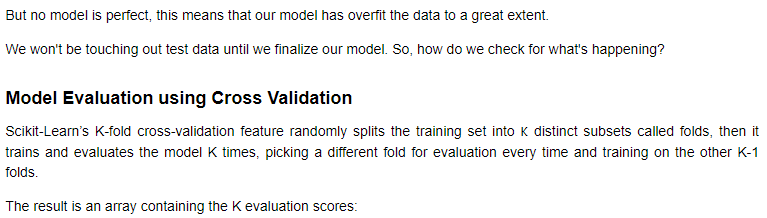

# We use cross validation to test our data on Unssen foldes of data so that we wouldn't have to use the Test Data

In [ ]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(tree_reg, 
                         prepared_data, 
                         data_labels, 
                         scoring="neg_mean_squared_error", 
                         cv = 10)
tree_reg_rmse_scores = np.sqrt(-scores)

In [ ]:
tree_reg_rmse_scores

array([3.62448272, 2.94501698, 2.92200702, 3.50486269, 2.20028407,
       3.20361124, 3.67134172, 3.89895819, 4.23933196, 2.63377565])

In [ ]:
tree_reg_rmse_scores.mean()

3.2843672251305294

In [ ]:
scores = cross_val_score(lin_reg, prepared_data, data_labels, scoring="neg_mean_squared_error", cv = 10)
lin_reg_rmse_scores = np.sqrt(-scores)
lin_reg_rmse_scores

array([3.43254597, 3.45157629, 3.6621715 , 2.59652976, 2.48023405,
       2.74798115, 3.32524647, 2.42208917, 3.78133275, 2.8573747 ])

In [ ]:
lin_reg_rmse_scores.mean()

3.0757081793709333

# **Random Forest model**

In [ ]:

from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor()
forest_reg.fit(prepared_data, data_labels)
forest_reg_cv_scores = cross_val_score(forest_reg,
                                         prepared_data,
                                         data_labels,
                                         scoring='neg_mean_squared_error',
                                         cv = 10)

forest_reg_rmse_scores = np.sqrt(-forest_reg_cv_scores)
forest_reg_rmse_scores.mean()

2.5538353402390217

# **Support Vector Machine Regressor**

In [ ]:
from sklearn.svm import SVR

svm_reg = SVR(kernel='linear')
svm_reg.fit(prepared_data, data_labels)
svm_cv_scores = cross_val_score(svm_reg, prepared_data, data_labels,
                                scoring='neg_mean_squared_error',
                                cv = 10)
svm_rmse_scores = np.sqrt(-svm_cv_scores)
svm_rmse_scores.mean()

3.08659162080283

# **Hyperparameter Tuning using GridSearchCV**

Now we see that of all the models - Random Forest is the best one and now we will choose to do hyperparameter tuning on this.

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
  ]

forest_reg = RandomForestRegressor()

grid_search = GridSearchCV(forest_reg, param_grid,
                           scoring='neg_mean_squared_error',
                           return_train_score=True,
                           cv=10,
                          )

grid_search.fit(prepared_data, data_labels)

GridSearchCV(cv=10, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_j

In [ ]:
grid_search.best_params_

{'max_features': 6, 'n_estimators': 30}

In [ ]:
cv_scores = grid_search.cv_results_

##printing all the parameters along with their scores
for mean_score, params in zip(cv_scores['mean_test_score'], cv_scores["params"]):
    print(np.sqrt(-mean_score), params)

3.49236507245207 {'max_features': 2, 'n_estimators': 3}
2.949031205206746 {'max_features': 2, 'n_estimators': 10}
2.866390791761858 {'max_features': 2, 'n_estimators': 30}
3.412279654681936 {'max_features': 4, 'n_estimators': 3}
2.8021919991321083 {'max_features': 4, 'n_estimators': 10}
2.7064220050547263 {'max_features': 4, 'n_estimators': 30}
3.294719150876767 {'max_features': 6, 'n_estimators': 3}
2.8905681960416953 {'max_features': 6, 'n_estimators': 10}
2.6673121979924175 {'max_features': 6, 'n_estimators': 30}
3.0710938597704422 {'max_features': 8, 'n_estimators': 3}
2.7453023861739263 {'max_features': 8, 'n_estimators': 10}
2.700942214962458 {'max_features': 8, 'n_estimators': 30}
3.3379409519023993 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
2.9088525686478217 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
3.3657902184781023 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
3.026266390476726 {'bootstrap': False, 'max_features': 3, 'n_estimat

# Checking Feature importance

In [ ]:
# feature importances 

feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances

array([0.18375025, 0.26252615, 0.16941407, 0.15466781, 0.01658014,
       0.11260927, 0.03015453, 0.06226483, 0.00368454, 0.00178125,
       0.00256716])

The below result means that Feature - 'acc_on_power' is the most important feature

In [ ]:
extra_attrs = ["acc_on_power", "acc_on_cyl"]
numerics = ['float64', 'int64']
num_attrs = list(data.select_dtypes(include=numerics))

attrs = num_attrs + extra_attrs
sorted(zip(attrs, feature_importances), reverse=True)

[('acc_on_power', 0.030154531473539196),
 ('acc_on_cyl', 0.062264825329454564),
 ('Weight', 0.1546678130823767),
 ('Model Year', 0.11260926937933692),
 ('Horsepower', 0.16941406501995362),
 ('Displacement', 0.262526154074204),
 ('Cylinders', 0.18375024945480495),
 ('Acceleration', 0.016580138718651802)]

# Evaluating the entire system on Test Data

In [ ]:
# Choosing the Nest model from Grid Search CV results
final_model = grid_search.best_estimator_

X_test = strat_test_set.drop("MPG", axis=1)
y_test = strat_test_set["MPG"].copy()

X_test_preprocessed = preprocess_origin_cols(X_test)
X_test_prepared = pipeline_transformer(X_test_preprocessed)

final_predictions = final_model.predict(X_test_prepared)
final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)

In [ ]:
final_rmse


3.0086088054854274

# Creating a function to cover this entire flow

In [ ]:
def predict_mpg(config, model):
    
    if type(config) == dict:
        df = pd.DataFrame(config)
    else:
        df = config
    
    preproc_df = preprocess_origin_cols(df)
    prepared_df = pipeline_transformer(preproc_df)
    y_pred = model.predict(prepared_df)
    return y_pred

You will have to provide to predict on all categorical classes: 
'Origin': [3, 2, 1]

else getting error or incorrect value

Explanation at :  37:00

https://www.youtube.com/watch?v=WNDUjUCWAQE&list=PLIkXejH7XPT9eeLQXbjMudA8x65E44UF3&index=3



In [ ]:

##checking it on a random sample
vehicle_config = {
    'Cylinders': [4, 6, 8],
    'Displacement': [155.0, 160.0, 165.5],
    'Horsepower': [93.0, 130.0, 98.0],
    'Weight': [2500.0, 3150.0, 2600.0],
    'Acceleration': [15.0, 14.0, 16.0],
    'Model Year': [81, 80, 78],
    'Origin': [3, 2, 1]
}

predict_mpg(vehicle_config, final_model)

array([33.49      , 18.61666667, 19.60666667])

# Save the Model

In [ ]:
import pickle


In [ ]:
##saving the model
with open("model.bin", 'wb') as f_out:
    pickle.dump(final_model, f_out)
    f_out.close()

In [ ]:
##loading the model from the saved file
with open('model.bin', 'rb') as f_in:
    model = pickle.load(f_in)

predict_mpg(vehicle_config, model)

array([33.49      , 18.61666667, 19.60666667])